# What is Numpy?
- Python library ที่มีความสามารถในการคำนวณ และประมาณผลหลากหลาย ทางด้านคณิตศาสตร์ และสถิติ สำหรับข้อมูลในรูปแบบ array หลายมิติ (multi-dimensional array) -> ndarray class
- วิธีการติดตั้ง Numpy library โดยใช้ pip package manager
        >pip install numpy
   *โดยปกติแล้ว numpy จะถูกติดตั้งมาพร้อมกับ python อยู่แล้ว*

### Install numpy

In [ ]:
# วิธีการติดตั้งผ่าน jupyter notebook
!pip install numpy # for pip commandline
!conda install numpy # for conda enviralment

### ข้อแตกต่างระหว่าง Numpy กับ Python List
- ประสิทธิภาพในการเข้าถึงข้อมูลที่แตกต่างกัน
- ประเภทของข้อมูลที่แตกต่างกัน list เก็บได้หลาย data type แต่ ndarray เก็บ data type ได้ประเภทเดียว 
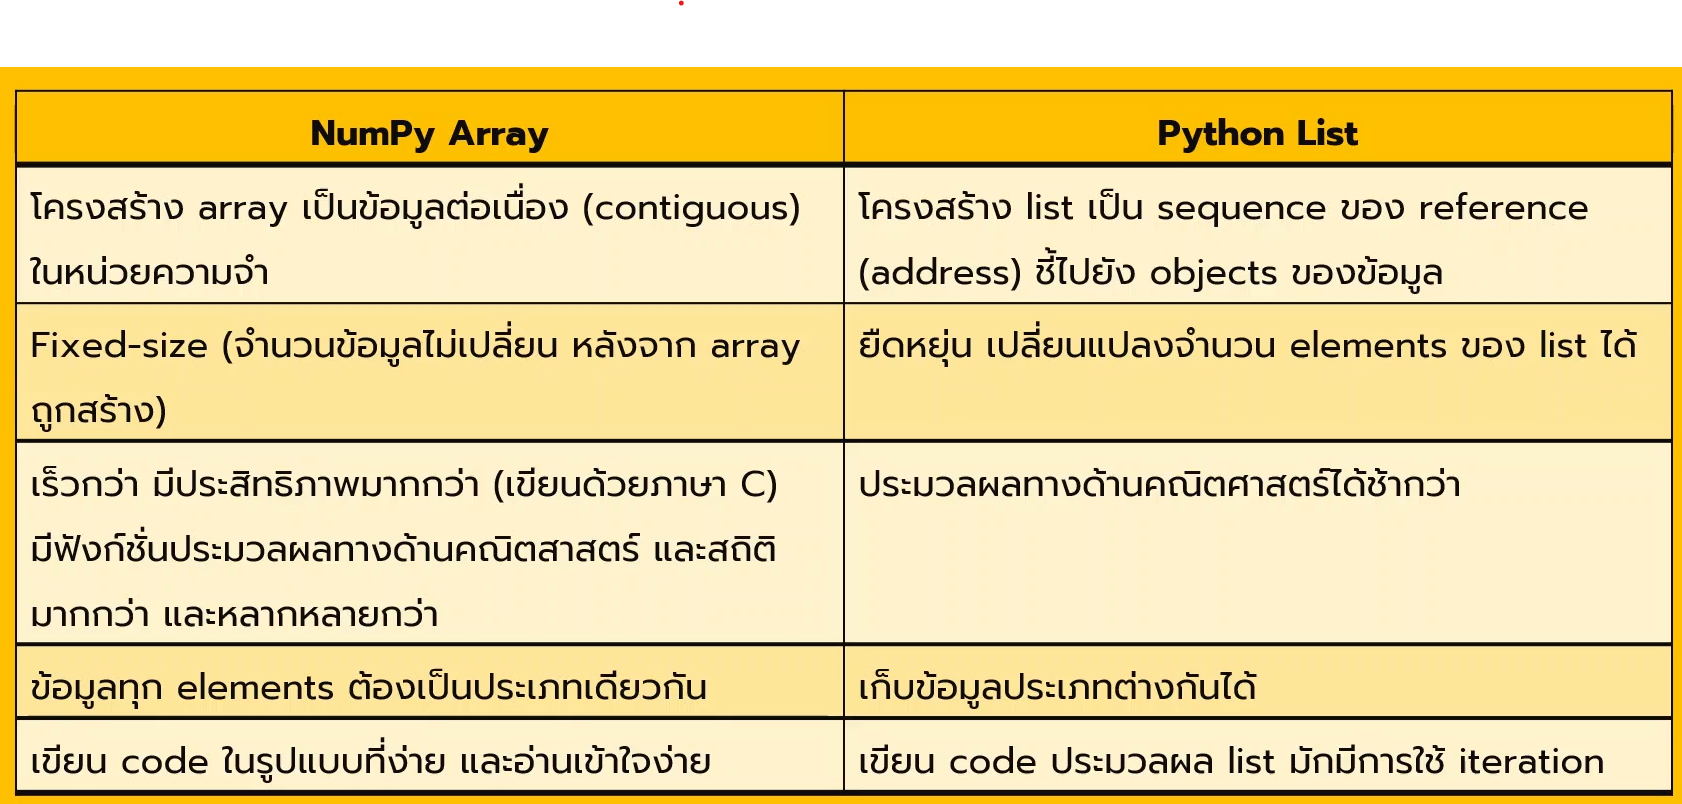

### Numpy vs List

In [2]:
import numpy as np

size = 500000

x = np.arange(0, size)
y = np.arange(0, size)

In [ ]:
x*y

In [ ]:
# Magic command
%timeit -n5 x*y

In [3]:
lx = list(range(0,size))
ly = list(range(0,size))

%timeit -n5 [lx[i] * ly[i] for i in range(0,size)]

79.7 ms ± 2.94 ms per loop (mean ± std. dev. of 7 runs, 5 loops each)


In [4]:
%timeit -n5 list(map(lambda x,y: x*y, lx,ly))

58.1 ms ± 1.48 ms per loop (mean ± std. dev. of 7 runs, 5 loops each)


# ทำความรู้จักและเข้าใจโครงสร้างของ Numpy array

### Understand Numpy array
- ลักษณะโครงสร้าง ndarray
- ทำความเข้าใจ dtype ของ numpy array
- การสร้าง ndarray ด้วยวิธีต่างๆ 
- การข้าถึงข้อมูล และดึงข้อมูลด้วยวิธี indexing และ slicing

### Numpy ndarray Structure

In [ ]:
import numpy as np
x = np.array([10,20,30,40,50,60,70,80])

print(x)
print('dtype =', x.dtype)
print('item size =', x.dtype.itemsize)
print('item x[0] =', x[0])
print('type of item x[0] =', type(x[0]))

In [ ]:
import numpy as np
x = np.array([10,20,30,40,50,60,70,80]).reshape(-1,1)

print(x)
print('dtype =', x.dtype)
print('item size =', x.dtype.itemsize)
print('item x[0] =', x[0])
print('type of item x[0] =', type(x[0]))

In [ ]:
import numpy as np
x = np.array([10,20,30,40,50,60,70,80], np.float64)

print(x)
print('dtype =', x.dtype)
print('item size =', x.dtype.itemsize)
print('item x[0] =', x[0])
print('type of item x[0] =', type(x[0]))

In [ ]:
import numpy as np
x = np.array([10,20,30,40,50,60,70,80], np.object_)

print(x)
print('dtype =', x.dtype)
print('item size =', x.dtype.itemsize)
print('item x[0] =', x[0])
print('type of item x[0] =', type(x[0]))

In [ ]:
import numpy as np
x = np.array([10,20,30,40,50,60,70,80], np.str_)

print(x)
print('dtype =', x.dtype)
print('item size =', x.dtype.itemsize)
print('item x[0] =', x[0])
print('type of item x[0] =', type(x[0]))

Documentation np.dtype
Ref: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

### Define structure dtype

In [ ]:
# Define customer structure dtype
customer_dtype = np.dtype([('cid',np.str_,10),('name',str,30), ('age',np.int8)])

# Customer records
cust_list = [('c100','David',25), ('c200','Phil',30), ('c300','Steve',35)]

# Create customer_dtype ndarray
customers = np.array(cust_list, customer_dtype)

print(customers)
print(customers[0])
print(customers['name'])
print(customers[customers['age'] > 30]) #Advance indexing 

# Concept Shape, Axis, และวิธีการสร้าง Numpy Array 

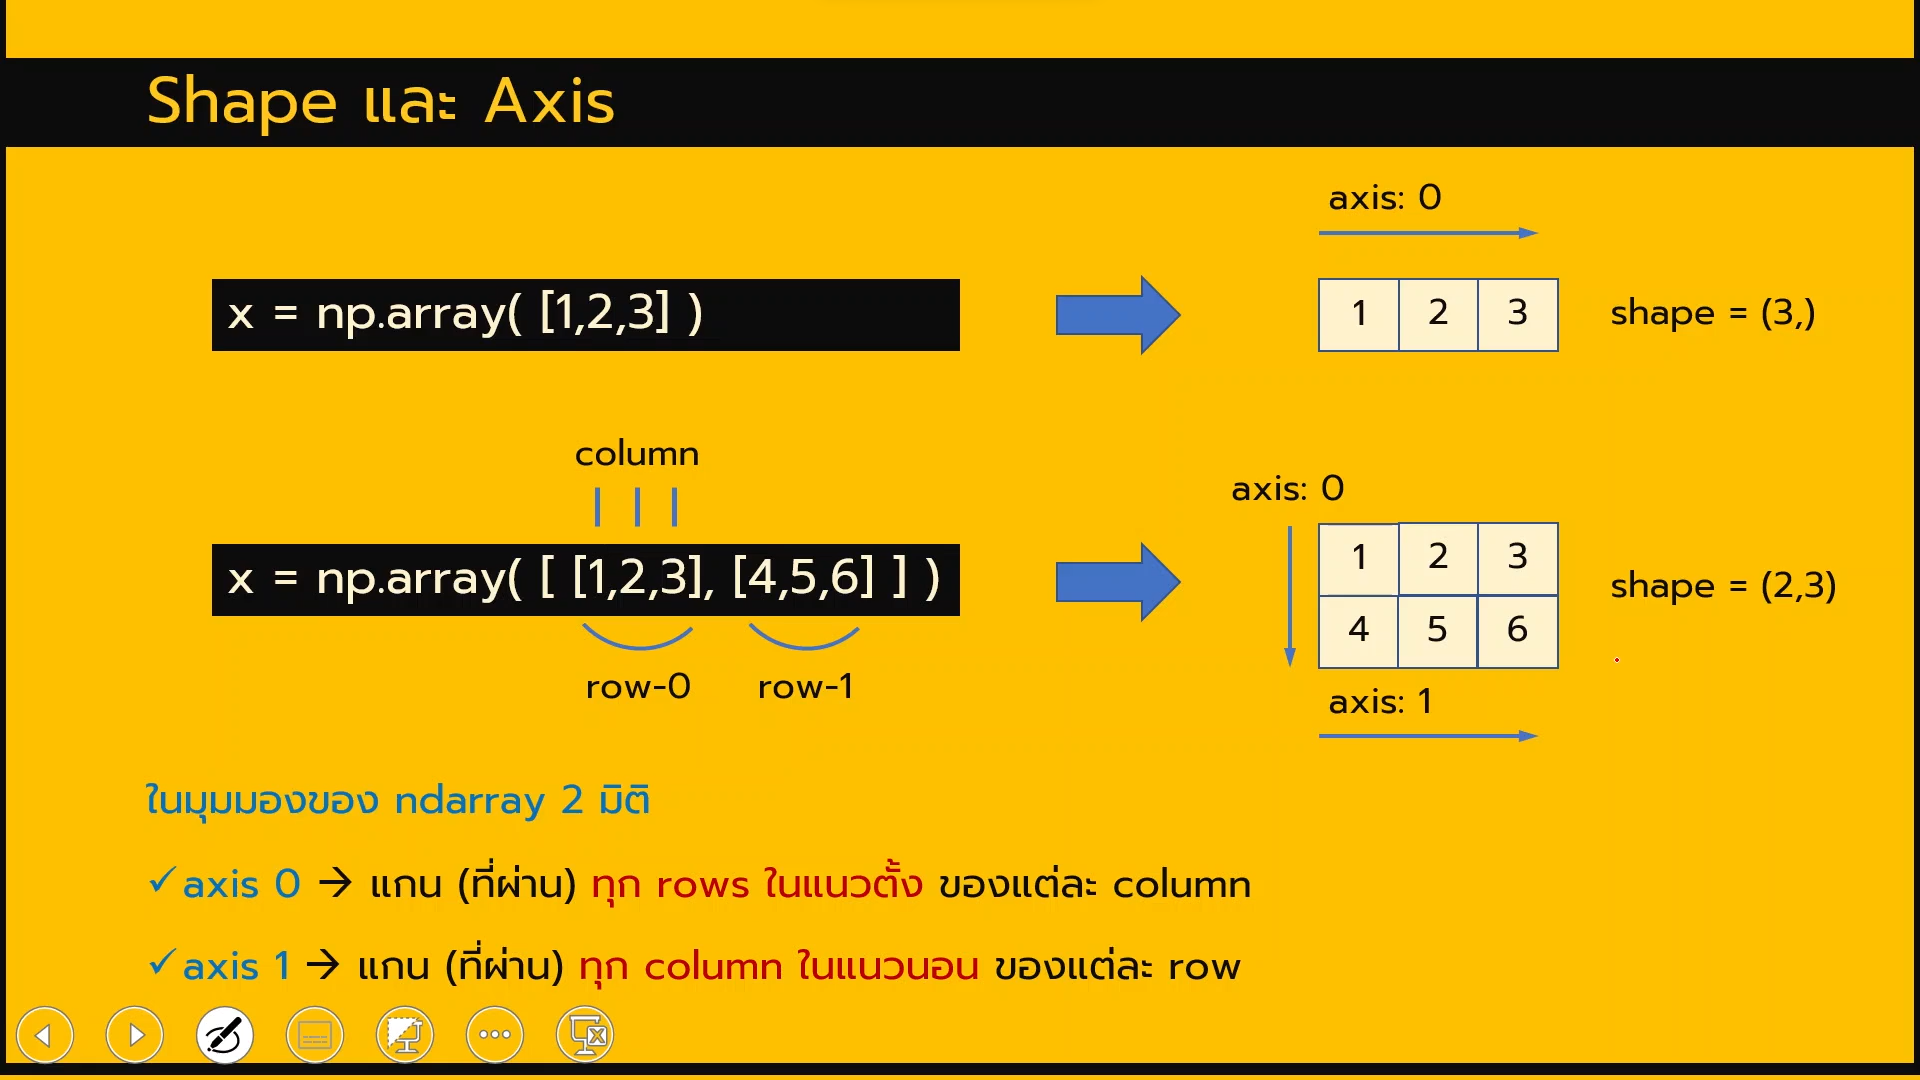

## การสร้าง ndarray
**Methods ที่ใช้สร้าง ndarray**
1. numpy.array() เป็นการสร้าง ndarray ตามค่าที่เราใส่เข้าไป
2. numpy.arange() เป็นการสร้าง array ขึ้นมาตามช่วงของข้อมูลที่กำหนด
3. numpy.empty() สร้าง array ว่าง
4. numpy.zeros() 
5. numpy.ones()

**Option ในการสร้าง ndarray**
- ให้ numpy กำหนด dtype เองตามลักษณะข้อมูล
- กำหนด dtype เอง
- การสร้าง multi-dimensional array
- กำหนด array items เป็น structure object
- Row-major vs column-major order

## Create n-dimensional array
-------------------------------------------------
### Use numpy.array()
- Create **2d array** useing *numpy.array()*


In [ ]:
x = np.array(range(1,13))
print(x)
print(x.shape)

- **ndarray.reshape()**

In [ ]:
rx = x.reshape(3,4)
print(x)
print(rx)
# side effect คือ ผลลัพธ์ที่ได้จะเป็นการสร้าง view ของข้อมูลไม่ใช่การสร้าง copy

- **View vs Copy**

In [ ]:
x[0] = 1

print(x)
print(rx)
# rx เป็นแค่ view ของ x

In [ ]:
rx.base

In [ ]:
rx = x.reshape(3,4).copy()

x[0]=100
print(x)
print(rx)

- **Row-major as Column-major** Order

การจัดเรียงข้อมูลให้ต่อเนื่องที่ส่งผลต่อประสิทธิภาพของการดึงข้อมูลที่ต่างกัน

In [ ]:
# order = 'C' -> row-major order คือ การจัดเรียงข้อมูลให้เสร็จที่ละแถว
# C ย่อมาจากภาษา C
x = np.array(range(1,13)).reshape(3,4, order='C')
print(x)

In [ ]:
# order = 'F' -> column-major order
x = np.array(range(1,13)).reshape(3,4, order='F')
print(x)

- Create **2d array** using *numpy.array()*

In [ ]:
x = np.array([[1,2,3], [4,5,6]])
print(x)
print(x.shape)

- **Working with Axis**

In [ ]:
print(x, '\n')

print('np.sum(x, axis=0 =', np.sum(x, axis=0))

print('np.sum(x, axis=1 =', np.sum(x, axis=1))

- Create **3d array** using *numpy.array()*

In [ ]:
x = np.array([[[1,2,3], [4,5,6]],[[7,8,9],[10,11,12]]])
print(x)
print(x.shape)

- Create **ndarray of objects**

In [ ]:
x = np.array([[1,2,3],[4,5,6],[7,8]])

In [ ]:
x = np.array([[1,2,3],[4,5,6],[7,8]], dtype=object)
print(x)
print(x.shape)

- Create an array using arange() based on the specified number range and step.

In [ ]:
x = np.arange(10,90,10, np.float64)
print(x)
print(x.shape)

### Use numpy.empty(), numpy.zeros(), numpy.ones()

In [ ]:
m = np.empty((3,2), dtype=int)
print(m)

In [ ]:
m = np.zeros((3,2), dtype=int)
print(m)

In [ ]:
m = np.ones((3,2), dtype=int)
print(m)

# การเข้าถึงข้อมูลด้วย indexing & slicing
indexing คือ กลไกการเข้าถึงข้อมูลหรือ items ใน array index number คือ ตัวกำหนดตำแหน่งใน array

slicing คือ กระบวนการตัดข้อมูลบางส่วนเพื่อมาใช้งาน ซึ่งจะใช้กลไกของ indexing ในการทำงาน


## Indexing and Slicing Array
-----------------------------

### Understand arrray indexing

In [ ]:
import numpy as np

x = np.arange(0,12).reshape(4,3)
x

- Access a **specific item**

In [ ]:
x[0,2] # x[row,column]

In [ ]:
x[0,2] = -9

In [ ]:
x

- Access an **entire row**

In [ ]:
x[1]

In [ ]:
x[1] = 8
x

- Access an **entire column**

In [ ]:
x[:,0:2]

### Understand array slicing
**Note**: The sliced array is a **VIEW** of the original array.

**Slicing with `[start:stop:step]`
- similar to the way of indexing list works
- **Note** that *difference between slicing and direct indexing on specific item*

In [ ]:
x = np.arange(0,20).reshape(4,5)
x

In [ ]:
x[1:]

In [ ]:
x[1:3]

In [ ]:
x = np.arange(0,100).reshape(10,10)
x

In [ ]:
x[0:8:2]

In [ ]:
x[-3:]

In [ ]:
x[:-3]

### Slicing 3d array

In [ ]:
x = np.arange(0,12).reshape(2,3,2)
x

In [ ]:
x[0,0:2,] # x[array_dimen1 , array_dimen2 , array_dimen3]

In [ ]:
x[0,0:2,1]

## Advanced indexing
- Use **Integer Indexing** to select arbitrary items in each dimentions (1)
- Use **Boolean Indexing** to select arbitrary items in each dimentions (2)
- Use **Boolean as Masking index** to select specific elements based on certain criteria. (3)

In [ ]:
# Integer Indexing
x = np.arange(0,20).reshape(4,5)
x

In [ ]:
x[[0,1]]

In [ ]:
x[[0,1],[1,3]] # x[[row],[column]]

In [ ]:
x[ [ [1,1],[3,3],[0,2] ] , [ [1,2],[1,2],[2,3] ] ]

## Test after class

In [ ]:
x = np.arange(0,20).reshape(4,5)
x

In [ ]:
y = x[:-2,1:3]
y

In [ ]:
x[:-2,1:3] = 8
x
y

In [ ]:
x > 15

## Array manipulation = ใช้ปรับเปลี่ยนโครงสร้างเพิ่มหรือลบข้อมูลใน Numpy array

### Numpy - Array Manipulation

### Method Reshape Array

`reshape()` vs `resize()`

In [1]:
import numpy as np

In [2]:
x = np.arange(1,13)
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [3]:
reshape_x = x.reshape(6,2)
print(reshape_x) # เป็นลักษณะของการวิวจากค่า x

[[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]
 [11 12]]


In [4]:
reshape_x[0,0] = 11
print(reshape_x)
print(x)

# ลักษณะของ method นี้จะเป็นการ view data จาก base

[[11  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]
 [11 12]]
[11  2  3  4  5  6  7  8  9 10 11 12]


In [5]:
reshape_x.base is x

True

In [6]:
# alternative method
x[:, np.newaxis] #provide 2D array


array([[11],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12]])

In [7]:
x[np.newaxis,:] 

array([[11,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]])

### Different from using `resize()`

- `numpy.resize()` returns the **new** resized ndarray **(not view)**
- เป็นการสร้าง array 2 มิติ แบบ copy ข้อมูลจาก base มา

In [7]:
resize_x = np.resize(x, (6,2))
print(resize_x)

[[11  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]
 [11 12]]


In [9]:
resize_x.base is x

False

In [10]:
print(reshape_x.base is x)
print(resize_x.base is x)

True
False


### `flatten()`
- Convert n-dimension array to 1-d array

In [11]:
resize_x.flatten()

array([11,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

### `transpose()`
- Reverse the axes of array

In [12]:
reshape_x

array([[11,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10],
       [11, 12]])

In [15]:
print(reshape_x.transpose()) # method 1
print(reshape_x.T) # method 2 short form

[[11  3  5  7  9 11]
 [ 2  4  6  8 10 12]]
[[11  3  5  7  9 11]
 [ 2  4  6  8 10 12]]


## Join array

### `concatenate()`
- Concatenate ***array elements*** **along their corrresponding, existing axis.**

In [16]:
x = np.arange(0,6).reshape(2,3)
print('x:\n', x, '\n')
y = np.arange(6,12).reshape(2,3)
print('y:\n',y,'\n')

x:
 [[0 1 2]
 [3 4 5]] 

y:
 [[ 6  7  8]
 [ 9 10 11]] 



In [18]:
con_ax0 = np.concatenate((x,y))
print('concatenate with axis = 0','\n')
print(con_ax0, '\n')

con_ax1 = np.concatenate((x,y), axis=1)
print('concatenate with axis = 1','\n')
print(con_ax1,'\n')

concatenate with axis = 0 

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]] 

concatenate with axis = 1 

[[ 0  1  2  6  7  8]
 [ 3  4  5  9 10 11]] 



In [1]:
import numpy as np

## Vectorization and Broadcasting

### 1.1 NumPy operations on arrays with the same shape

In [3]:
x = np.arange(0,5)
print('x:\n', x,'\n')

y = np.arange(5,10)
print('y:\n', y, '\n')

print(x+y)

x:
 [0 1 2 3 4] 

y:
 [5 6 7 8 9] 

[ 5  7  9 11 13]


### 1.2 NumPy  operations  on arrays with the different shapes 

In [6]:
x = np.arange(0,5)
print('x:\n', x,'\n')
print('x.shape =', x.shape)

y = np.arange(5,6)
print('y:\n', y, '\n')
print('y.shape =', y.shape)


x:
 [0 1 2 3 4] 

x.shape = (5,)
y:
 [5] 

y.shape = (1,)


In [ ]:
# y -> [5 5 5 5 5]

In [7]:
x+y

array([5, 6, 7, 8, 9])

###  1.3 NumPy operations on arrays with compatible dimensions
- with **1-d arrays**

In [12]:
x = np.arange(0,5)
print('x:\n', x,'\n')
print('x.shape =', x.shape)

y = np.array([10])
print('y:\n', y, '\n')
print('y.shape =', y.shape)


print('x*y:\n', x*y)
print('y -> [10 10 10 10 10]')

x:
 [0 1 2 3 4] 

x.shape = (5,)
y:
 [10] 

y.shape = (1,)
x*y:
 [ 0 10 20 30 40]
y -> [10 10 10 10 10]


- with **2-d arrays**

In [15]:
x = np.arange(0,12).reshape(2,6)
print('x:\n', x,'\n')
print('x.shape =', x.shape)

y = np.arange(0,6).reshape(1,6)
print('y:\n', y, '\n')
print('y.shape =', y.shape, '\n')

print('x*y:\n', x*y)

x:
 [[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]] 

x.shape = (2, 6)
y:
 [[0 1 2 3 4 5]] 

y.shape = (1, 6) 

x*y:
 [[ 0  1  4  9 16 25]
 [ 0  7 16 27 40 55]]


In [ ]:
# y -> [[0 1 2 3 4 5],
#       [0 1 2 3 4 5]]

- with **3-d arrays**

In [16]:
x = np.arange(0,18).reshape(2,3,3)
print('x:\n', x,'\n')
print('x.shape =', x.shape)

y = np.arange(0,6).reshape(2,3,1)
print('y:\n', y, '\n')
print('y.shape =', y.shape, '\n')

print('x*y:\n', x*y)

x:
 [[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]]

 [[ 9 10 11]
  [12 13 14]
  [15 16 17]]] 

x.shape = (2, 3, 3)
y:
 [[[0]
  [1]
  [2]]

 [[3]
  [4]
  [5]]] 

y.shape = (2, 3, 1) 

x*y:
 [[[ 0  0  0]
  [ 3  4  5]
  [12 14 16]]

 [[27 30 33]
  [48 52 56]
  [75 80 85]]]


In [ ]:
[[[0 0 0],
  [1 1 1],
  [2 2 2],
]]

- two arrays with **different number of dimensions**

In [17]:
x = np.arange(0,6).reshape(2,3)
print('x:\n', x,'\n')
print('x.shape =', x.shape)

y = np.arange(0,3)
print('y:\n', y, '\n')
print('y.shape =', y.shape, '\n')

print('x*y:\n', x*y)

x:
 [[0 1 2]
 [3 4 5]] 

x.shape = (2, 3)
y:
 [0 1 2] 

y.shape = (3,) 

x*y:
 [[ 0  1  4]
 [ 0  4 10]]


In [ ]:
# y -> [[0 1 2],
#       [0 1 2]]

# Math Operations and Sorting in NumPy 
-----------------------------

In [18]:
scores = np.array([
    [75,80,85],
    [85,80,75],
    [80,85,90],
    [90,85,80],
    [70,80,90]
])

print(scores)

[[75 80 85]
 [85 80 75]
 [80 85 90]
 [90 85 80]
 [70 80 90]]


In [19]:
print(np.min(scores, axis=0))
print('\n')
print(np.min(scores, axis=1))

[70 80 75]


[75 75 80 80 70]


In [20]:
print(np.max(scores, axis=0))
print('\n')
print(np.max(scores, axis=1))

[90 85 90]


[85 85 90 90 90]


In [21]:
print(np.mean(scores, axis=0))
print('\n')
print(np.mean(scores, axis=1))

[80. 82. 84.]


[80. 80. 85. 85. 80.]


In [22]:
print(np.sum(scores, axis=0))
print('\n')
print(np.sum(scores, axis=1))

[400 410 420]


[240 240 255 255 240]


In [25]:
x = np.arange(-5,5)
print('x:', x)

y = 2*x +10
print('y:', y)

x: [-5 -4 -3 -2 -1  0  1  2  3  4]
y: [ 0  2  4  6  8 10 12 14 16 18]


# Sorting and Filtering/Searching
************

- Use `numpy.sort` >> return a **copy** of sorted ndarray

In [26]:
scores

array([[75, 80, 85],
       [85, 80, 75],
       [80, 85, 90],
       [90, 85, 80],
       [70, 80, 90]])

In [28]:
# small - large   [ascending sort]
print(np.sort(scores, axis=0))
print('\n')
print(np.sort(scores, axis=1))


[[70 80 75]
 [75 80 80]
 [80 80 85]
 [85 85 90]
 [90 85 90]]


[[75 80 85]
 [75 80 85]
 [80 85 90]
 [80 85 90]
 [70 80 90]]


In [31]:
# large - small   [reverse sort]
print(-(np.sort(-scores, axis=0)))
print('\n')
print(-(np.sort(-scores, axis=1)))


[[90 85 90]
 [85 85 90]
 [80 80 85]
 [75 80 80]
 [70 80 75]]


[[85 80 75]
 [85 80 75]
 [90 85 80]
 [90 85 80]
 [90 80 70]]


- Sort by **structure field** - order by *field_name*

In [34]:
# create customer data type
customer_dtype = np.dtype([('cid',str,10), ('name',str,30), ('age',np.int8)])

# create customer records
cus_list = [('C100','David',35),('C200','Steve',25), ('C300','Tom', 45)]

# create NumPy array
customers = np.array(cus_list, customer_dtype)

print(customers)

[('C100', 'David', 35) ('C200', 'Steve', 25) ('C300', 'Tom', 45)]


In [36]:
print(np.sort(customers, order='age'))

[('C200', 'Steve', 25) ('C100', 'David', 35) ('C300', 'Tom', 45)]


In [37]:
print(np.sort(customers, order='age')[::-1])

[('C300', 'Tom', 45) ('C100', 'David', 35) ('C200', 'Steve', 25)]


# NumPy - Random Sampling 

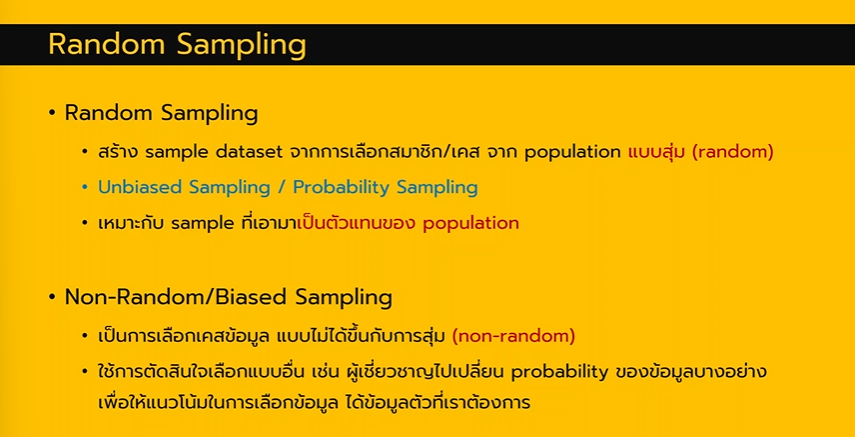

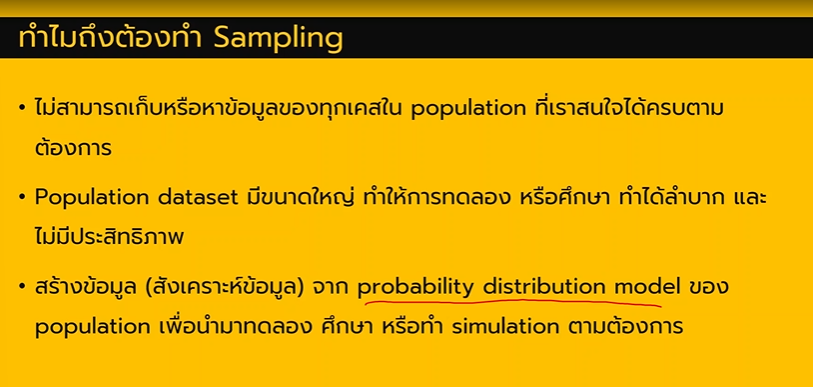

In [1]:
import numpy as np
from numpy.random import default_rng

## 1. Random Number Generator
-----
### 1.1 Recent Numpy Version
- The new approach to generate random numbers in NumPy with better statistical properties.

In [2]:
# Create object of default random number generator
rng = default_rng()

# Random 5 float numbers from 0.0 to 1.0
rng.random(5)

array([0.23620525, 0.63460877, 0.48742688, 0.5806379 , 0.35245065])

### 1.2 Legacy Versions

In [3]:
from numpy import random

random.rand(5)

array([0.23633936, 0.14052768, 0.04087707, 0.3093676 , 0.36190035])

### 1.3 Seed Number
- Use to **control the sequence of random state of random number generator**

In [9]:
# seed = 2023 ใช้สำหรับควบคุมการสุ่มตัวอย่างให้ได้ชุดการสุ่มข้อมูลเดียวกัน
rng = default_rng(2023)
rng.random(50)

array([0.08805445, 0.22044004, 0.11317055, 0.44296683, 0.69733142,
       0.54618215, 0.7618605 , 0.58490128, 0.89652651, 0.15080669,
       0.50414064, 0.8513867 , 0.18271743, 0.61337721, 0.28488716,
       0.8596104 , 0.5387042 , 0.43922287, 0.32509706, 0.94341586,
       0.75195988, 0.43320474, 0.95060126, 0.4944435 , 0.2071413 ,
       0.94990368, 0.77675245, 0.81880049, 0.15366353, 0.88756818,
       0.86871535, 0.91224457, 0.62981511, 0.86095331, 0.42038683,
       0.32426978, 0.87118188, 0.93311913, 0.36964362, 0.28289723,
       0.80416855, 0.25591335, 0.85759332, 0.34258007, 0.24251233,
       0.19941089, 0.15310635, 0.85111198, 0.84292417, 0.42993314])

In [8]:
# seed = 2023
rng = default_rng(2023)
rng.random(50)

array([0.08805445, 0.22044004, 0.11317055, 0.44296683, 0.69733142,
       0.54618215, 0.7618605 , 0.58490128, 0.89652651, 0.15080669,
       0.50414064, 0.8513867 , 0.18271743, 0.61337721, 0.28488716,
       0.8596104 , 0.5387042 , 0.43922287, 0.32509706, 0.94341586,
       0.75195988, 0.43320474, 0.95060126, 0.4944435 , 0.2071413 ,
       0.94990368, 0.77675245, 0.81880049, 0.15366353, 0.88756818,
       0.86871535, 0.91224457, 0.62981511, 0.86095331, 0.42038683,
       0.32426978, 0.87118188, 0.93311913, 0.36964362, 0.28289723,
       0.80416855, 0.25591335, 0.85759332, 0.34258007, 0.24251233,
       0.19941089, 0.15310635, 0.85111198, 0.84292417, 0.42993314])

# Basic Random Numbers
--------
### 2.1 Random Integer

In [11]:
rng = default_rng()
rng.integers(low=0, high=10, endpoint=True, size=5)

array([10,  6,  8,  9,  6], dtype=int64)

### 2.2 Random Float Numbers
- Random float numbers from [0.0, 1.0]

In [12]:
rng.random(5)

array([0.61007969, 0.18320005, 0.29810851, 0.19245407, 0.35518001])

- **reshape** ndarray after sampling

In [13]:
rng.random(10).reshape(2,5)

array([[0.53185516, 0.3695859 , 0.80091396, 0.09047377, 0.61338961],
       [0.43969244, 0.73378617, 0.3090018 , 0.04388721, 0.41016394]])

### 2.3 Random a sample from a given dataset
- random from 1d array dataset

In [15]:
int_ds = np.arange(0,150,3)
int_ds

array([  0,   3,   6,   9,  12,  15,  18,  21,  24,  27,  30,  33,  36,
        39,  42,  45,  48,  51,  54,  57,  60,  63,  66,  69,  72,  75,
        78,  81,  84,  87,  90,  93,  96,  99, 102, 105, 108, 111, 114,
       117, 120, 123, 126, 129, 132, 135, 138, 141, 144, 147])

In [16]:
rng.choice(int_ds, size=10)

array([  3,  27, 147,  90,   9,  30,  72, 138,  39,   9])

In [17]:
rng.choice(int_ds, size=(5,2))

array([[132,  84],
       [ 48,  54],
       [  0, 117],
       [123,  75],
       [ 39, 147]])

- Random from 2d array dataset

In [19]:
int_ds2 = int_ds.reshape(5,10)
int_ds2

array([[  0,   3,   6,   9,  12,  15,  18,  21,  24,  27],
       [ 30,  33,  36,  39,  42,  45,  48,  51,  54,  57],
       [ 60,  63,  66,  69,  72,  75,  78,  81,  84,  87],
       [ 90,  93,  96,  99, 102, 105, 108, 111, 114, 117],
       [120, 123, 126, 129, 132, 135, 138, 141, 144, 147]])

- Random along axis=0(row), but **select all columns** of the sampled rows

In [20]:
x = rng.choice(int_ds2, size=(2,), axis=0)
print(x)
print('x.shape:', x.shape)

[[120 123 126 129 132 135 138 141 144 147]
 [ 30  33  36  39  42  45  48  51  54  57]]
x.shape: (2, 10)


- Random along axis=1 (column), but **select all rows** of the sampled columns

In [21]:
x = rng.choice(int_ds2, size=(2,), axis=1)
print(x)
print('x.shape:', x.shape)

[[ 18   0]
 [ 48  30]
 [ 78  60]
 [108  90]
 [138 120]]
x.shape: (5, 2)


# Permutation
------
### 3.1 shuffle method
- **Shuffle** the array and update it **in-place** with the shuffled values.

In [22]:
x = np.arange(0,10)
print(x)
print('\n')

rng = default_rng()
rng.shuffle(x)
print(x)

[0 1 2 3 4 5 6 7 8 9]


[5 9 3 0 1 6 7 8 2 4]


In [24]:
x = np.arange(0,12).reshape(3,4)
print(x ,'\n')

rng.shuffle(x, axis=0)
print(x)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]] 

[[ 4  5  6  7]
 [ 8  9 10 11]
 [ 0  1  2  3]]


In [25]:
x = np.arange(0,12).reshape(3,4)
print(x ,'\n')

rng.shuffle(x, axis=1)
print(x)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]] 

[[ 1  2  0  3]
 [ 5  6  4  7]
 [ 9 10  8 11]]


###  3.2 Permuted method
- use **permuted()** method - creata a **new shuffled array**

In [26]:
x = np.arange(0,10)
print(x ,'\n')

pm = rng.permuted(x)
print(pm)

[0 1 2 3 4 5 6 7 8 9] 

[3 6 1 5 2 8 9 4 0 7]


In [27]:
x is pm

False

In [ ]:
sas